In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_big = pd.read_csv('WOWTDR_prepdat.csv')

In [3]:
data_big

,ID,obs,Bedrock_Depth_fix,Dist_Mouth_m,DrainDens,Drain_Class_fix,FAC_sqkm,Group,HAND_1,HUC12,...,tp_vrm,tph_ge_3_2017,tphc_ge_3_2017,tphh_ge_3_2017,upstrm_reachID,vpdmax_yr_m_0,vpdmax_yr_m_1,vpdmax_yr_m_2,x,y
0,1521,Wet,127.005844,11747.430511,10.703786,2.002337,0.017350,80,36.513630,171003020502,...,0.013455,633.265198,410.841125,222.627335,None,36.199806,34.117901,34.970486,502852.865537,4.754270e+06
1,1522,Wet,105.312111,11741.217308,3.815225,2.245037,0.188075,80,49.883854,171003020502,...,0.009777,938.024292,608.747070,329.261536,None,38.442825,36.223309,36.631279,502802.865537,4.754275e+06
2,1522,Wet,105.312111,11741.217308,3.815225,2.245037,0.188075,80,49.883854,171003020502,...,0.009777,938.024292,608.747070,329.261536,None,38.442825,36.223309,36.631279,502802.865537,4.754275e+06
3,1523,Wet,150.085037,11892.283325,3.016542,2.001134,0.279025,80,60.034954,171003020502,...,0.008055,1006.149658,118.900230,887.236389,None,38.138504,35.914341,36.540077,502907.865537,4.754395e+06
4,1524,Wet,143.067368,5062.140472,3.584770,2.001104,1.327500,80,41.273933,171003020502,...,0.004564,1113.289307,844.548340,268.824402,None,38.361652,36.583889,36.537746,498227.865537,4.755385e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,1229,Wet,0.000000,12822.910633,4.597613,3.907427,1.772050,80,2.797891,171002030902,...,0.001237,259.459900,196.853378,62.410049,None,7.153027,9.315274,10.443623,430492.865537,5.016200e+06
2940,1230,Wet,0.000000,12167.138988,6.747243,1.000376,0.041275,80,22.454512,171002030902,...,0.014645,666.590759,612.020691,54.322666,None,11.350513,12.179909,12.822898,430577.865537,5.016925e+06
2941,1231,Wet,0.000000,11700.656665,2.106842,3.143033,0.096825,80,8.850307,171002030902,...,0.003168,627.400757,466.121155,161.126389,None,8.025269,10.124486,11.113398,429947.865537,5.017105e+06
2942,1232,Wet,0.000000,11751.367343,10.722786,1.000667,0.012350,80,34.278549,171002030902,...,0.008305,538.705139,453.737823,84.842560,None,10.696782,12.747306,13.148885,429797.865537,5.017155e+06


In [4]:
data = data_big[['ID', 'obs','FAC_sqkm', 'elev','d_slp20_m', 'ppt_sum_yr_m_0', 'ppt_yr_m_0', 'seg_slope_perc', 'STRAHLER', 'SumUpSlpLen_km']]
data

,ID,obs,FAC_sqkm,elev,d_slp20_m,ppt_sum_yr_m_0,ppt_yr_m_0,seg_slope_perc,STRAHLER,SumUpSlpLen_km
0,1521,Wet,0.017350,495.685852,0.191701,907.394043,1.760924,0.143396,1,0.213852
1,1522,Wet,0.188075,493.571167,0.182880,893.925049,2.039627,0.114214,2,0.791475
2,1522,Wet,0.188075,493.571167,0.182880,893.925049,2.039627,0.114214,2,0.791475
3,1523,Wet,0.279025,527.804443,0.282713,884.830017,1.130813,0.027854,2,0.888181
4,1524,Wet,1.327500,331.478577,0.001914,903.159729,1.332044,-0.000350,3,4.923404
...,...,...,...,...,...,...,...,...,...,...
2939,1229,Wet,1.772050,180.377106,0.007826,1987.466064,14.422233,0.000000,3,8.286954
2940,1230,Wet,0.041275,208.910355,0.242794,2762.189453,15.028871,0.007385,1,0.288175
2941,1231,Wet,0.096825,218.520081,0.114993,2064.167480,14.570926,0.043012,1,0.208603
2942,1232,Wet,0.012350,211.710831,0.429275,2475.022217,14.767077,0.712601,1,0.144373


# Initial Exploration

## Plots compare all features to eachother to look for any initial patterns or trends that might be present in the data

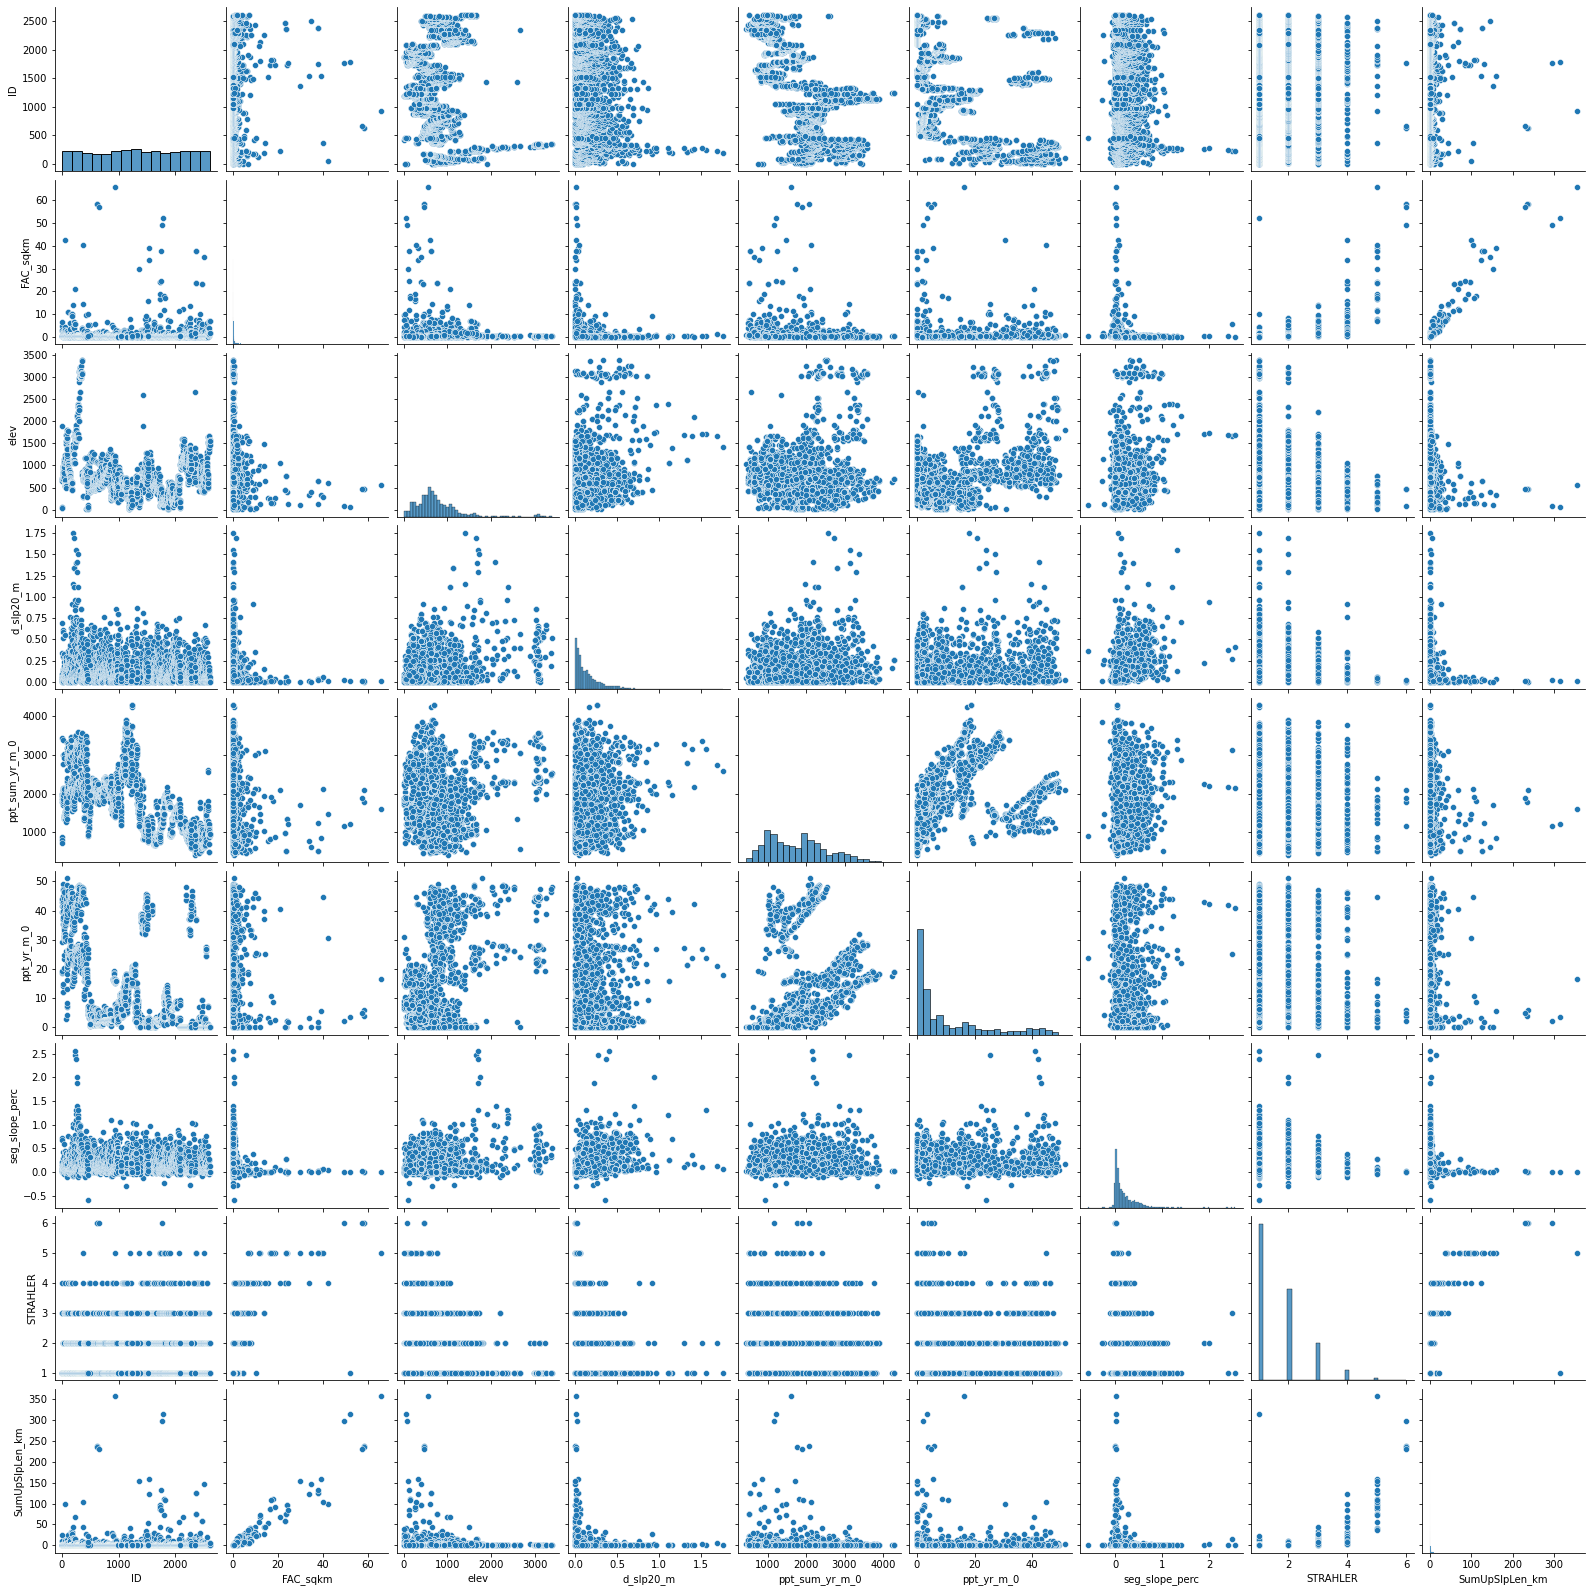

In [5]:
import seaborn as sns

sns.pairplot(data)

Text(0.5, 1.0, 'ppt_sum_yr_m_0 vs ppt_yr_m_0')

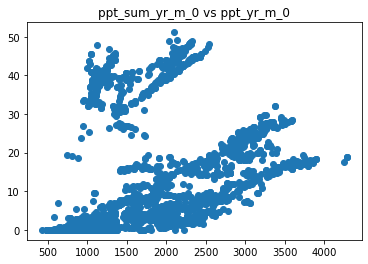

In [6]:
plt.scatter(data['ppt_sum_yr_m_0'],data['ppt_yr_m_0'])
plt.title('ppt_sum_yr_m_0 vs ppt_yr_m_0')

Text(0.5, 1.0, 'elev vs SumUpSlpLen_km')

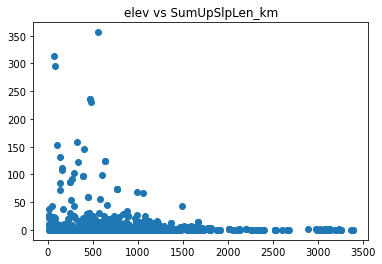

In [7]:
plt.scatter(data['elev'],data['SumUpSlpLen_km'])
plt.title('elev vs SumUpSlpLen_km')

More upstream segment lengths at lower elevations

Text(0.5, 1.0, 'elev vs seg_slope_perc')

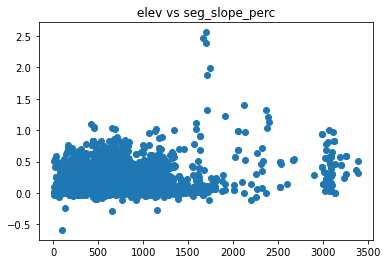

In [8]:
plt.scatter(data['elev'],data['seg_slope_perc'])
plt.title('elev vs seg_slope_perc')

Text(0.5, 1.0, 'STRAHLER vs elev')

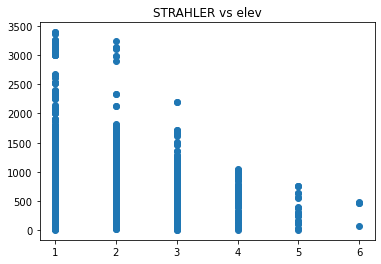

In [9]:
plt.scatter(data['STRAHLER'],data['elev'])
plt.title('STRAHLER vs elev')

More tributaries at lower eleveations?

# Anomaly Detection

In [10]:
col_means = data.mean()
col_stds = data.std()

summary_df = pd.DataFrame({'Mean': col_means, 'Std': col_stds})

summary_df = summary_df.drop(['ID', 'STRAHLER'])
summary_df['+std'] = summary_df['Mean']+summary_df['Std']
summary_df['-std'] = summary_df['Mean']-summary_df['Std']
summary_df['+2std'] = summary_df['Mean']+2*summary_df['Std']
summary_df['-2std'] = summary_df['Mean']-2*summary_df['Std']
summary_df

# mean, standard deviation, mean+-standard deviation and mean +-2 standard devaitions

C:\Users\nakae\AppData\Local\Temp\ipykernel_10956\3547297296.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  col_means = data.mean()
C:\Users\nakae\AppData\Local\Temp\ipykernel_10956\3547297296.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  col_stds = data.std()


,Mean,Std,+std,-std,+2std,-2std
FAC_sqkm,0.905280,3.788024,4.693303,-2.882744,8.481327,-6.670768
elev,759.969443,532.936509,1292.905952,227.032934,1825.842462,-305.903576
d_slp20_m,0.162275,0.181071,0.343347,-0.018796,0.524418,-0.199867
ppt_sum_yr_m_0,1779.625728,770.447543,2550.073271,1009.178184,3320.520815,238.730641
ppt_yr_m_0,11.150111,13.640089,24.790200,-2.489978,38.430289,-16.130067
seg_slope_perc,0.178111,0.224343,0.402454,-0.046232,0.626797,-0.270576
SumUpSlpLen_km,3.334422,16.249644,19.584066,-12.915222,35.833711,-29.164867


In [11]:
# potential anomalies based on data with stats above and below the mean+1std

pot_anom = data[((data.d_slp20_m>summary_df['+std'][2])) & 
     ((data.elev>summary_df['+std'][1])|(data.elev<summary_df['-std'][1])) &
     ((data.ppt_sum_yr_m_0>summary_df['+std'][3])|(data.ppt_sum_yr_m_0<summary_df['-std'][3])) &
     ((data.ppt_yr_m_0>summary_df['+std'][4])|(data.ppt_yr_m_0<summary_df['-std'][4])) &
     ((data.seg_slope_perc>summary_df['+std'][5])|(data.seg_slope_perc<summary_df['-std'][5]))]
pot_anom


,ID,obs,FAC_sqkm,elev,d_slp20_m,ppt_sum_yr_m_0,ppt_yr_m_0,seg_slope_perc,STRAHLER,SumUpSlpLen_km
1725,302,Wet,0.144500,2254.352295,0.476037,3314.685303,27.971653,-0.060525,1,0.716570
1737,311,Dry,0.212050,3117.998535,0.496126,3265.708740,27.751223,0.820703,2,0.891833
1738,312,Wet,0.215325,3105.280273,0.494346,3267.611572,27.756277,0.651074,2,0.916987
1739,313,Dry,0.090350,3073.343262,0.550390,3219.040283,26.803871,0.454475,1,0.121647
1740,313,Dry,0.090350,3073.343262,0.550390,3219.040283,26.803871,0.454475,1,0.121647
1741,314,Dry,0.093000,3068.485107,0.659546,3219.020996,26.805405,0.999854,1,0.135978
1742,315,Dry,0.104025,3192.048096,0.573184,3191.222412,26.834063,0.574707,1,0.253522
1776,338,Dry,0.135750,3038.083740,0.578807,3458.892822,27.587765,0.686874,1,0.464932


In [12]:
# high elevation with negative seg_slope_perc
data[(data.elev>summary_df['+2std'][1])&
    (data.seg_slope_perc<0)]

,ID,obs,FAC_sqkm,elev,d_slp20_m,ppt_sum_yr_m_0,ppt_yr_m_0,seg_slope_perc,STRAHLER,SumUpSlpLen_km
1697,278,Wet,0.512575,2201.536865,0.019360,3350.088135,27.985580,-0.111625,3,1.795816
1710,288,Wet,0.111600,2363.571777,0.959123,3274.350342,26.963144,-0.004248,1,0.284300
1725,302,Wet,0.144500,2254.352295,0.476037,3314.685303,27.971653,-0.060525,1,0.716570
1784,344,Wet,0.232125,3133.945312,0.002933,2379.297363,44.476463,-0.001001,1,0.313963
1785,345,Wet,0.232375,3133.952393,0.029980,3497.787354,27.410370,-0.007043,1,0.321034


Should seg_slope_perc be negative? essentially level slope if negative? How do they collect slope pct, how accurate are the instruments used?

In [13]:
# data at high elev with multiple tributaries and small sum of upstream seg lengths
# data at elev > mean+std, strahler >=3 and SumUpSlpLen_km < mean
data[((data.elev>summary_df['+std'][1]))&
    ((data.STRAHLER>=3)) &
    ((data.SumUpSlpLen_km<summary_df['Mean'][6]))]

,ID,obs,FAC_sqkm,elev,d_slp20_m,ppt_sum_yr_m_0,ppt_yr_m_0,seg_slope_perc,STRAHLER,SumUpSlpLen_km
1696,277,Wet,0.506175,2202.761475,0.050000,2276.082764,43.643147,0.144922,3,1.778685
1697,278,Wet,0.512575,2201.536865,0.019360,3350.088135,27.985580,-0.111625,3,1.795816
1698,279,Wet,0.642000,1716.826416,0.040112,2205.277832,42.937809,0.062573,3,2.662708
1699,280,Wet,0.643350,1716.428467,0.231775,3212.751221,25.510551,0.016699,3,2.672709
2048,2595,Dry,2.245050,1662.599365,0.158131,1229.502563,0.000000,-0.037600,3,2.782382
2049,2595,Dry,2.245050,1662.599365,0.158131,1229.502563,0.000000,-0.037600,3,2.782382


In [14]:
data[data['seg_slope_perc']<-0.2]

,ID,obs,FAC_sqkm,elev,d_slp20_m,ppt_sum_yr_m_0,ppt_yr_m_0,seg_slope_perc,STRAHLER,SumUpSlpLen_km
2001,2263,Dry,1.686625,1156.673340,0.214732,1178.891968,32.592640,-0.274878,1,1.926208
2285,1800,Wet,0.107600,133.414291,0.262671,1473.087158,4.194302,-0.234965,2,0.854868
2756,1127,Wet,0.241975,651.704956,0.015472,3850.409668,17.375002,-0.283008,2,1.986199
2911,457,Wet,0.277525,102.153717,0.360407,917.575012,23.823397,-0.588933,1,1.143649


Seperate data based on method of data collection?

### AutoEncoder

Once the data is flagged as anomly or not, train the data on the normal non anomolous data and test on the flagged data.

would be a realtime anomoly detector for future data

use pytorch for autoencoding

In [16]:
import tensorflow as tf

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler,OneHotEncoder, PolynomialFeatures, OrdinalEncoder

In [12]:
X = data.drop(['obs','ID','STRAHLER'],axis=1)
y = data['obs']

In [13]:
X=X.values
y=y.values

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [15]:
min_val = tf.reduce_min(X_train)
max_val = tf.reduce_max(X_train)

X_train = (X_train - min_val) / (max_val - min_val)
X_test = (X_test - min_val) / (max_val - min_val)

X_train = tf.cast(X_train, tf.float32)
X_test = tf.cast(X_test, tf.float32)

In [16]:
class AnomalyDetector(Model):
    
    def __init__(self):
        super(AnomalyDetector, self).__init__()
        self.encoder = tf.keras.Sequential([
          layers.Dense(4, activation="relu"),
          layers.Dense(2, activation="relu")])
          

        self.decoder = tf.keras.Sequential([
          layers.Dense(4, activation="relu"),
          layers.Dense(7, activation="sigmoid")])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = AnomalyDetector()

In [17]:
autoencoder.compile(optimizer='adam', loss = losses.MeanSquaredError())

In [18]:
iters = autoencoder.fit(X_train,X_train,
               epochs=50,
               shuffle=True,
               validation_data =(X_test, X_test))

Epoch 1/50
69/69 [==============================] - 3s 10ms/step - loss: 0.1862 - val_loss: 0.1718
Epoch 2/50
69/69 [==============================] - 0s 5ms/step - loss: 0.1545 - val_loss: 0.1347
Epoch 3/50
69/69 [==============================] - 0s 5ms/step - loss: 0.1142 - val_loss: 0.0936
Epoch 4/50
69/69 [==============================] - 0s 4ms/step - loss: 0.0766 - val_loss: 0.0613
Epoch 5/50
69/69 [==============================] - 0s 4ms/step - loss: 0.0502 - val_loss: 0.0406
Epoch 6/50
69/69 [==============================] - 0s 4ms/step - loss: 0.0337 - val_loss: 0.0278
Epoch 7/50
69/69 [==============================] - 0s 4ms/step - loss: 0.0235 - val_loss: 0.0201
Epoch 8/50
69/69 [==============================] - 0s 4ms/step - loss: 0.0175 - val_loss: 0.0155
Epoch 9/50
69/69 [==============================] - 0s 4ms/step - loss: 0.0138 - val_loss: 0.0127
Epoch 10/50
69/69 [==============================] - 0s 4ms/step - loss: 0.0116 - val_loss: 0.0109
Epoch 11/50
69/69 

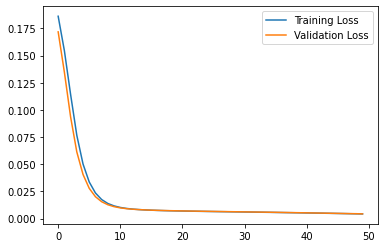

In [19]:
plt.plot(iters.history['loss'], label='Training Loss')
plt.plot(iters.history["val_loss"], label="Validation Loss")
plt.legend()

In [20]:
reconstructions = autoencoder.predict(X_train)
train_loss = tf.keras.losses.mae(reconstructions, X_train)

69/69 [==============================] - 0s 2ms/step


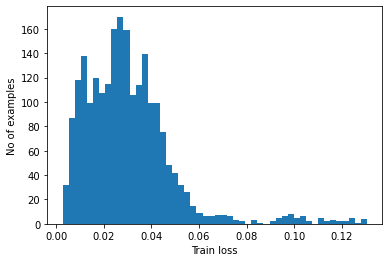

In [21]:
# Histogram of the reconstruction error on training data
plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

Detect anomalies by calculating whether the reconstruction loss is greater than a fixed threshold.

calculate the mean average error for normal examples from the training data, then classify future examples as anomalous if the reconstruction error is higher than one standard deviation from the training data.

In [22]:
threshold = np.mean(train_loss) + 3*np.std(train_loss)
threshold

0.0872168131172657

## Isolation Forest

In [44]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, OrdinalEncoder
from sklearn.impute import SimpleImputer

In [45]:
data.head()

,ID,obs,FAC_sqkm,elev,d_slp20_m,ppt_sum_yr_m_0,ppt_yr_m_0,seg_slope_perc,STRAHLER,SumUpSlpLen_km
0,1521,Wet,0.017350,495.685852,0.191701,907.394043,1.760924,0.143396,1,0.213852
1,1522,Wet,0.188075,493.571167,0.182880,893.925049,2.039627,0.114214,2,0.791475
2,1522,Wet,0.188075,493.571167,0.182880,893.925049,2.039627,0.114214,2,0.791475
3,1523,Wet,0.279025,527.804443,0.282713,884.830017,1.130813,0.027854,2,0.888181
4,1524,Wet,1.327500,331.478577,0.001914,903.159729,1.332044,-0.000350,3,4.923404


In [46]:
data.obs[data.obs=='Wet']=1
data.obs[data.obs=='Dry']=0
data['obs']=data.obs.apply(pd.to_numeric)

C:\Users\nakae\AppData\Local\Temp\ipykernel_20660\1355873098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Wet']=1
C:\Users\nakae\AppData\Local\Temp\ipykernel_20660\1355873098.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Dry']=0
C:\Users\nakae\AppData\Local\Temp\ipykernel_20660\1355873098.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

In [135]:
X = data.drop(['obs','ID'],axis=1)
y = data['obs']

In [136]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [137]:
numerical_feats = ['FAC_sqkm','elev','d_slp20_m','ppt_sum_yr_m_0','ppt_yr_m_0','seg_slope_perc','SumUpSlpLen_km']
categorical_feats = ['STRAHLER']

In [138]:
num_processor = Pipeline(steps=[
    ('scaler', StandardScaler())  
])


In [139]:
feat_processor = ColumnTransformer(transformers = [
    ('num_pipe', num_processor,numerical_feats),
],remainder='drop')

In [140]:
model = IsolationForest(random_state=50)

In [141]:
pipe = Pipeline(steps=[
    ('feature_processor', feat_processor),
    ('model', model)
])
pipe

Pipeline(steps=[('feature_processor',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['FAC_sqkm', 'elev',
                                                   'd_slp20_m',
                                                   'ppt_sum_yr_m_0',
                                                   'ppt_yr_m_0',
                                                   'seg_slope_perc',
                                                   'SumUpSlpLen_km'])])),
                ('model', IsolationForest(random_state=50))])

In [142]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('feature_processor',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['FAC_sqkm', 'elev',
                                                   'd_slp20_m',
                                                   'ppt_sum_yr_m_0',
                                                   'ppt_yr_m_0',
                                                   'seg_slope_perc',
                                                   'SumUpSlpLen_km'])])),
                ('model', IsolationForest(random_state=50))])

In [175]:
param_grid = {'model__n_estimators': [1200], 
              'model__max_samples': ['auto'], 
              'model__contamination': ['auto'], 
              'model__max_features': [4], 
              'model__bootstrap': [True], 
              'model__n_jobs': [-1]}

best_params = {'model__n_estimators': [1200], 
              'model__max_samples': ['auto'], 
              'model__contamination': [0.0001], 
              'model__max_features': [4], 
              'model__bootstrap': [True], 
              'model__n_jobs': [-1]}

In [176]:
grid_search = GridSearchCV(pipe, 
                        param_grid,
                        scoring="neg_mean_squared_error", 
                        refit=True,
                        cv=10, 
                        return_train_score=True,
                        error_score='raise')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
             estimator=Pipeline(steps=[('feature_processor',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['FAC_sqkm',
                                                                          'elev',
                                                                          'd_slp20_m',
                                                                          'ppt_sum_yr_m_0',
                                                                          'ppt_yr_m_0',
                                                                          'seg_slope_perc',
                                                                          'SumUpSlpLen_km'])])),
                                       ('model',
                                        IsolationForest(random_state=50))]),
             param_grid={'model__bootstrap': [True],
                         'model__contamination': ['auto'],
                         'model__max_features': [4],
                         'model__max_samples': ['auto'],
                         'model__n_estimators': [1200], 'model__n_jobs': [-1]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [177]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
             estimator=Pipeline(steps=[('feature_processor',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['FAC_sqkm',
                                                                          'elev',
                                                                          'd_slp20_m',
                                                                          'ppt_sum_yr_m_0',
                                                                          'ppt_yr_m_0',
                                                                          'seg_slope_perc',
                                                                          'SumUpSlpLen_km'])])),
                                       ('model',
                                        IsolationForest(random_state=50))]),
             param_grid={'model__bootstrap': [True],
                         'model__contamination': ['auto'],
                         'model__max_features': [4],
                         'model__max_samples': ['auto'],
                         'model__n_estimators': [1200], 'model__n_jobs': [-1]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [170]:
grid_search.best_params_

{'model__bootstrap': True,
 'model__contamination': 0.0001,
 'model__max_features': 4,
 'model__max_samples': 'auto',
 'model__n_estimators': 1200,
 'model__n_jobs': -1}

In [178]:
best_model=grid_search.best_estimator_

In [179]:
y_train_pred = best_model.fit_predict(X_train)
y_test_pred = best_model.fit_predict(X_test)

In [180]:
y_pred = best_model.fit_predict(X)

In [186]:
iforest_anom=X[y_pred==-1]
iforest_anom

,FAC_sqkm,elev,d_slp20_m,ppt_sum_yr_m_0,ppt_yr_m_0,seg_slope_perc,STRAHLER,SumUpSlpLen_km
10,15.723049,254.702469,0.006439,777.101562,3.155749,0.006860,4,53.912409
11,7.739100,289.862122,0.004159,757.118774,3.125610,0.037506,4,24.736420
14,33.766476,334.247162,0.014096,775.579346,3.139964,0.018092,4,123.106017
32,39.007450,319.913300,0.035834,859.324707,5.494297,0.034281,5,158.811139
127,4.776700,470.488739,0.000485,684.759827,0.041434,-0.000085,4,24.137328
...,...,...,...,...,...,...,...,...
2904,0.726225,298.355042,0.512149,3082.601318,12.003325,0.031985,3,4.049752
2909,0.768825,924.545532,0.868367,3146.742676,9.426083,0.082899,2,1.716263
2910,10.046675,35.693836,0.039999,1018.267456,25.464037,0.055327,1,23.565045
2911,0.277525,102.153717,0.360407,917.575012,23.823397,-0.588933,1,1.143649


In [277]:
anom_chunk = iforest_anom.loc['1737':'1800']

is there any overlap in the pot_anom and iforest_anom datapts?

In [304]:
anoms = pot_anom[pot_anom.isin(iforest_anom)] 
anoms

,ID,obs,FAC_sqkm,elev,d_slp20_m,ppt_sum_yr_m_0,ppt_yr_m_0,seg_slope_perc,STRAHLER,SumUpSlpLen_km
1725,NaN,NaN,0.144500,2254.352295,0.476037,3314.685303,27.971653,-0.060525,1,0.716570
1737,NaN,NaN,0.212050,3117.998535,0.496126,3265.708740,27.751223,0.820703,2,0.891833
1738,NaN,NaN,0.215325,3105.280273,0.494346,3267.611572,27.756277,0.651074,2,0.916987
1739,NaN,NaN,0.090350,3073.343262,0.550390,3219.040283,26.803871,0.454475,1,0.121647
1740,NaN,NaN,0.090350,3073.343262,0.550390,3219.040283,26.803871,0.454475,1,0.121647
1741,NaN,NaN,0.093000,3068.485107,0.659546,3219.020996,26.805405,0.999854,1,0.135978
1742,NaN,NaN,0.104025,3192.048096,0.573184,3191.222412,26.834063,0.574707,1,0.253522
1776,NaN,NaN,0.135750,3038.083740,0.578807,3458.892822,27.587765,0.686874,1,0.464932


In [322]:
anom_index= list(iforest_anom.index)
data[data.index.isin(anom_index)].drop_duplicates()

,ID,obs,FAC_sqkm,elev,d_slp20_m,ppt_sum_yr_m_0,ppt_yr_m_0,seg_slope_perc,STRAHLER,SumUpSlpLen_km
10,1529,1,15.723049,254.702469,0.006439,777.101562,3.155749,0.006860,4,53.912409
11,1530,1,7.739100,289.862122,0.004159,757.118774,3.125610,0.037506,4,24.736420
14,1533,0,33.766476,334.247162,0.014096,775.579346,3.139964,0.018092,4,123.106017
32,1546,1,39.007450,319.913300,0.035834,859.324707,5.494297,0.034281,5,158.811139
127,1624,1,4.776700,470.488739,0.000485,684.759827,0.041434,-0.000085,4,24.137328
...,...,...,...,...,...,...,...,...,...,...
2904,1325,1,0.726225,298.355042,0.512149,3082.601318,12.003325,0.031985,3,4.049752
2909,1329,1,0.768825,924.545532,0.868367,3146.742676,9.426083,0.082899,2,1.716263
2910,456,1,10.046675,35.693836,0.039999,1018.267456,25.464037,0.055327,1,23.565045
2911,457,1,0.277525,102.153717,0.360407,917.575012,23.823397,-0.588933,1,1.143649


**yes all of the pot_anoms found using the mean and std exist in the iforest_anom**

## XGBoost Classifier

In [18]:
import xgboost as xgb
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, OrdinalEncoder
from sklearn.impute import SimpleImputer

In [19]:
data.head()

,ID,obs,FAC_sqkm,elev,d_slp20_m,ppt_sum_yr_m_0,ppt_yr_m_0,seg_slope_perc,STRAHLER,SumUpSlpLen_km
0,1521,Wet,0.017350,495.685852,0.191701,907.394043,1.760924,0.143396,1,0.213852
1,1522,Wet,0.188075,493.571167,0.182880,893.925049,2.039627,0.114214,2,0.791475
2,1522,Wet,0.188075,493.571167,0.182880,893.925049,2.039627,0.114214,2,0.791475
3,1523,Wet,0.279025,527.804443,0.282713,884.830017,1.130813,0.027854,2,0.888181
4,1524,Wet,1.327500,331.478577,0.001914,903.159729,1.332044,-0.000350,3,4.923404


In [20]:
data.obs.unique()

array(['Wet', 'Dry'], dtype=object)

In [21]:
data.obs[data.obs=='Wet']=1
data.obs[data.obs=='Dry']=0

C:\Users\nakae\AppData\Local\Temp\ipykernel_37224\1719455315.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Wet']=1
C:\Users\nakae\AppData\Local\Temp\ipykernel_37224\1719455315.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Dry']=0


In [22]:
data['obs']=data.obs.apply(pd.to_numeric)

C:\Users\nakae\AppData\Local\Temp\ipykernel_37224\411345108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['obs']=data.obs.apply(pd.to_numeric)


In [23]:
data.obs.unique()

array([1, 0], dtype=int64)

In [24]:
X = data.drop(['obs','ID'],axis=1)
y = data['obs']

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [26]:
numerical_feats = ['FAC_sqkm','elev','d_slp20_m','ppt_sum_yr_m_0','ppt_yr_m_0','seg_slope_perc','SumUpSlpLen_km']
categorical_feats = ['STRAHLER']

In [27]:
num_processor = Pipeline(steps=[
    ('scaler', StandardScaler())  
])


In [28]:
feat_processor = ColumnTransformer(transformers = [
    ('num_pipe', num_processor,numerical_feats),
],remainder='drop')

In [29]:
clf= xgb.XGBClassifier()

In [30]:
pipe = Pipeline(steps=[
    ('feature_processor', feat_processor),
    ('clf', clf)
])
pipe

Pipeline(steps=[('feature_processor',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['FAC_sqkm', 'elev',
                                                   'd_slp20_m',
                                                   'ppt_sum_yr_m_0',
                                                   'ppt_yr_m_0',
                                                   'seg_slope_perc',
                                                   'SumUpSlpLen_km'])])),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_byt...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [31]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('feature_processor',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['FAC_sqkm', 'elev',
                                                   'd_slp20_m',
                                                   'ppt_sum_yr_m_0',
                                                   'ppt_yr_m_0',
                                                   'seg_slope_perc',
                                                   'SumUpSlpLen_km'])])),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_byt...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [32]:
parameters = {"clf__min_samples_leaf" : [1, 4,  8], # default 1
              "clf__min_samples_split" : [2, 4, 8], # default 2
              "clf__n_estimators" : [10, 25, 50, 100, 150], # default 100
              "clf__max_depth" : [2,5,10,15,20]} # default None (unlimited)

grid = GridSearchCV(pipe, parameters,cv=5,scoring='accuracy',n_jobs=-1,verbose=True)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits


KeyboardInterrupt: 

In [33]:
# grid search (degree of the poly features, n_neighbors, weights)
param_dic ={'clf__max_depth':[2,5,10,20],
             'clf__learning_rate':[.01,.05,.1,.2,.3,.4,.5],
              'clf__gamma':[0,.1,.5,.6,.8],
              'clf__n_estimators':[100,200,400,800],
              #'clf__min_child_weight':[1,2,3,4,5,6,8],
            #  'clf__subsample':[.5,.6,.7,.8,.9,1],
            #  'clf__colsample_bytree':[.5,.7,.8,.9,1],
             }
grid = GridSearchCV(pipe,param_dic,cv=5,scoring='accuracy',n_jobs=-1,verbose=1,error_score="raise")

In [34]:
grid.fit(X_train,y_train)


Fitting 5 folds for each of 560 candidates, totalling 2800 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('feature_processor',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['FAC_sqkm',
                                                                          'elev',
                                                                          'd_slp20_m',
                                                                          'ppt_sum_yr_m_0',
                                                                          'ppt_yr_m_0',
                                                                          'seg_slope_perc',
                                                                          'SumUpSlpLen_km'])])),
                                       ('clf',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_...
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'clf__gamma': [0, 0.1, 0.5, 0.6, 0.8],
                         'clf__learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4,
                                                0.5],
                         'clf__max_depth': [2, 5, 10, 20],
                         'clf__n_estimators': [100, 200, 400, 800]},
             scoring='accuracy', verbose=1)

In [35]:
grid.best_params_

{'clf__gamma': 0,
 'clf__learning_rate': 0.05,
 'clf__max_depth': 20,
 'clf__n_estimators': 400}

In [36]:
grid.best_score_

0.7608776844070961

In [37]:
best_clf=grid.best_estimator_

In [38]:
y_test_pred = best_clf.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score
accuracy_score(y_test,y_test_pred)

0.7635869565217391

In [39]:
confusion_matrix(y_test,y_test_pred)

array([[272,  81],
       [ 93, 290]], dtype=int64)